<a href="https://www.kaggle.com/code/nahdafathyya/psd-worldhappiness?scriptVersionId=239683407" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#load dataset
df = pd.read_csv('/kaggle/input/world-happiness/2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
# Rename kolom agar lebih mudah diproses (opsional)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Tentukan fitur dan target
features = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy',
            'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']
target = 'score'

X = df[features]
y = df[target]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_preds = lr_model.predict(X_test)

In [6]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)


In [7]:
def evaluate(model_name, y_test, y_pred):
    print(f"=== {model_name} ===")
    print("MSE :", mean_squared_error(y_test, y_pred))
    print("R2  :", r2_score(y_test, y_pred))
    print()

evaluate("Linear Regression", y_test, lr_preds)
evaluate("Random Forest", y_test, rf_preds)


=== Linear Regression ===
MSE : 0.41446413835283513
R2  : 0.6017537913445683

=== Random Forest ===
MSE : 0.3863682043125004
R2  : 0.6287503350133744



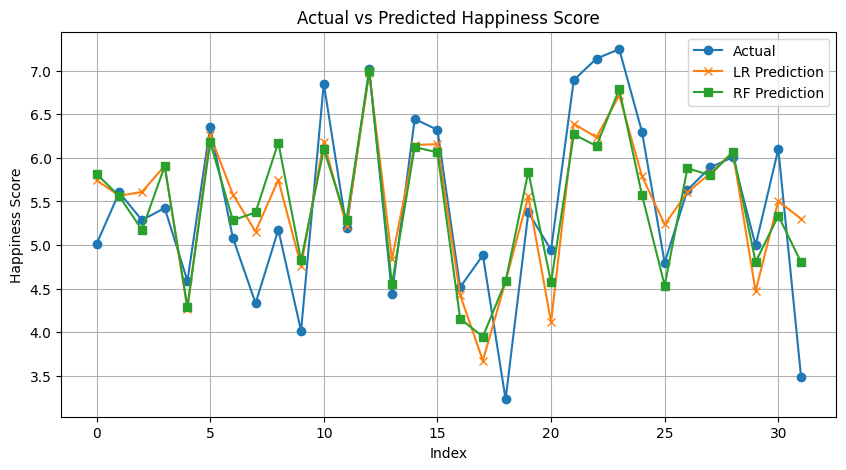

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(lr_preds, label='LR Prediction', marker='x')
plt.plot(rf_preds, label='RF Prediction', marker='s')
plt.legend()
plt.title("Actual vs Predicted Happiness Score")
plt.xlabel("Index")
plt.ylabel("Happiness Score")
plt.grid()
plt.show()


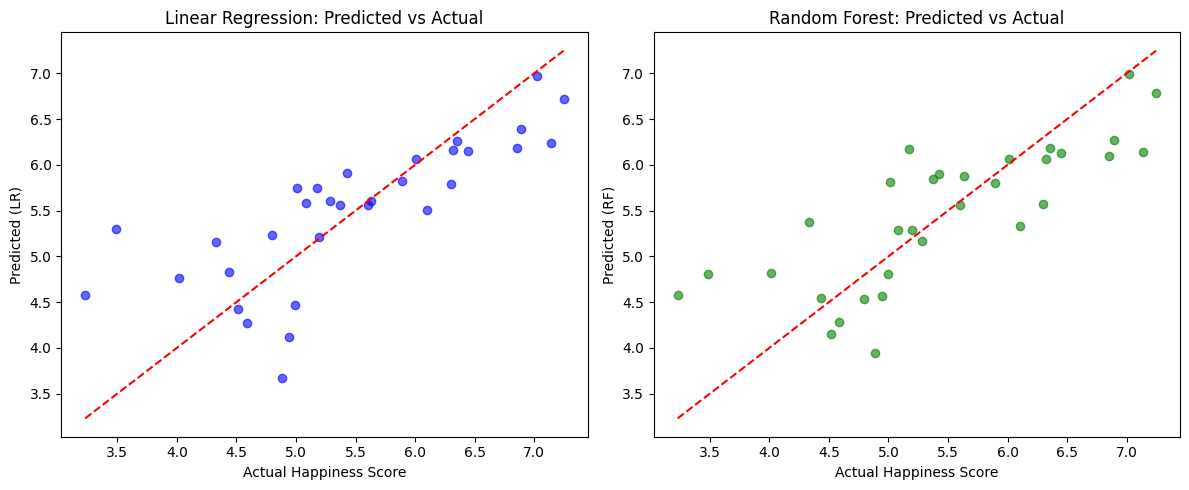

In [9]:
# Scatter plot Linear Regression
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_preds, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # garis ideal
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted (LR)')
plt.title('Linear Regression: Predicted vs Actual')

# Scatter plot Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_preds, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # garis ideal
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted (RF)')
plt.title('Random Forest: Predicted vs Actual')

plt.tight_layout()
plt.show()